from gitpod console

gitpod /workspace/boilerplate-page-view-time-series-visualizer (main) $ pip freeze | egrep "pandas|numpy|matplo|seabo"\
matplotlib==3.7.5\
numpy==1.24.4\
pandas==1.5.3\
seaborn==0.9.0

In [1]:
# !pip uninstall -y numpy pandas matplotlib --quiet

In [2]:
# using numpy 1.22.4 to avoid certain error "AttributeError: module 'numpy' has no attribute 'float'"  that appears at 1.24
!cat requirements.txt

numpy==1.22.4
pandas==1.5.3
matplotlib==3.7.5
seaborn==0.9.0


In [3]:
# lets install numpy 1.23.1

!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently 

In [29]:
!pip freeze |egrep "seaborn=|pandas=|numpy=|matplotlib="

geopandas==0.14.4
matplotlib==3.7.5
numpy==1.22.4
pandas==1.5.3
seaborn==0.9.0
sklearn-pandas==2.2.0


vs code needs to be closed and restarted before continuing, matplotlib reinstall needs that

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load data

In [32]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
# df = None

df = pd.read_csv( 'fcc-forum-pageviews.csv' , index_col='date'  )

In [33]:
#confirm
df.head(3)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716


In [34]:
df.shape

(1304, 1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


## Clean data
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [36]:
#low
low_drop_limit = df['value'].quantile(0.025)
low_drop_limit

17876.4

In [37]:
#high limit
high_drop_limit = df['value'].quantile(1-0.025)
high_drop_limit

177613.075

In [38]:
%%time
# this works

df[ (df['value'] >= low_drop_limit ) & (df['value'] <= high_drop_limit ) ]
# df

CPU times: user 1.53 ms, sys: 39 µs, total: 1.57 ms
Wall time: 1.58 ms


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [39]:
low_drop_limit_indexes = df[df['value'] <= low_drop_limit].index
low_drop_limit_indexes

Index(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12', '2016-05-13',
       '2016-05-14', '2016-05-15', '2016-05-16', '2016-05-17', '2016-05-18',
       '2016-05-20', '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
       '2016-05-25', '2016-05-30', '2016-05-31', '2016-06-01', '2016-06-02',
       '2016-06-03', '2016-06-04', '2016-06-05', '2016-06-06', '2016-06-10',
       '2016-06-11', '2016-06-12', '2016-06-13', '2016-06-16', '2016-07-19',
       '2016-07-30', '2016-07-31', '2018-10-02'],
      dtype='object', name='date')

In [40]:
high_drop_limit_indexes = df[df['value'] >= high_drop_limit].index
high_drop_limit_indexes

Index(['2018-10-14', '2018-10-16', '2019-06-17', '2019-06-18', '2019-07-10',
       '2019-08-06', '2019-08-07', '2019-10-16', '2019-10-21', '2019-10-22',
       '2019-10-23', '2019-10-24', '2019-10-28', '2019-10-29', '2019-10-30',
       '2019-10-31', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07',
       '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
       '2019-11-18', '2019-11-19', '2019-11-22', '2019-11-25', '2019-11-26',
       '2019-11-27', '2019-11-28', '2019-12-02'],
      dtype='object', name='date')

In [41]:
%%time
# this other method works too, but it takes a bit more time.
# just investigated how to do it this way to learn more

#
# low_drop_limit_indexes = df[df['value'] <= low_drop_limit].index
# high_drop_limit_indexes = df[df['value'] >= high_drop_limit].index
# df.drop( low_drop_limit_indexes ,inplace=True )
# df.drop(high_drop_limit_indexes,inplace=True)
# df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [42]:
# Clean data
# Clean the data by filtering out days when the page views were
# in the top 2.5% of the dataset or bottom 2.5% of the dataset.
low_drop_limit = df['value'].quantile(0.025)
high_drop_limit = df['value'].quantile(1-0.025)
df = df[ (df['value'] >= low_drop_limit ) & (df['value'] <= high_drop_limit ) ]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [43]:
# less rows than original, as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3+ KB


In [44]:
# making sure cleanup worked, it does
df.describe().loc[('max' , 'min'),:] , high_drop_limit , low_drop_limit

(        value
 max  177588.0
 min   18060.0,
 177613.075,
 17876.4)

In [45]:
# index still as object and not datetime .  not changing it yet as excercise does not says that
df.index.dtype.name

'object'

## Create a draw_line_plot function that uses Matplotlib

In [46]:
df.index.min() , df.index.max()

('2016-05-19', '2019-12-03')

In [47]:
df.index.values

array(['2016-05-19', '2016-05-26', '2016-05-27', ..., '2019-11-30',
       '2019-12-01', '2019-12-03'], dtype=object)

In [48]:
df.values

array([[ 19736],
       [ 18060],
       [ 19997],
       ...,
       [141161],
       [142918],
       [158549]])

In [49]:
#Create a draw_line_plot function that uses Matplotlib to draw
# a line chart similar to "examples/Figure_1.png".
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
# The label on the x axis should be Date and the label on the y axis should be Page Views.

# def draw_line_plot():
    # Draw line plot

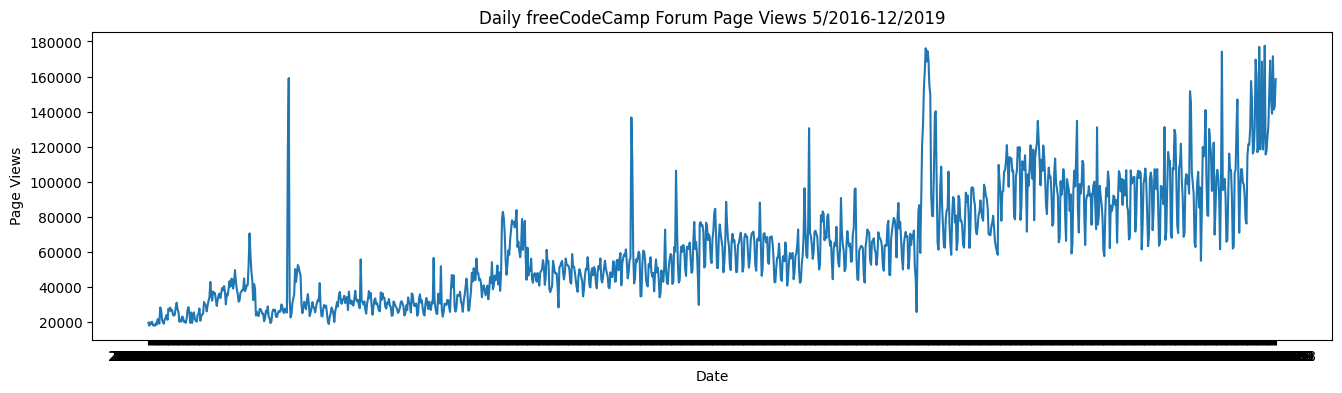

In [50]:
# This is the text that goes inside the function

fig, ax = plt.subplots(figsize=(16,4))
ax.plot (df.index.values, df.values)
ax.set(xlabel='Date', ylabel='Page Views',
       title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
# ax.grid()
plt.show()

## Create a draw_bar_plot function that draws a bar chart

In [51]:
# year column.  and month column is the same, but with index 1
# split info>  https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
# pd.to_datetime >  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# dt.month_name info > https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month_name.html

# df_bar = df.reset_index()
# df_bar['date'].str.split('-', expand=True)[0]

In [52]:
df_bar = df.reset_index()
df_bar['year'] = df_bar['date'].str.split('-', expand=True)[0]
df_bar['month'] = df_bar['date'].str.split('-', expand=True)[1]
df_bar['Month'] = pd.to_datetime(df_bar['date']).dt.month_name()

df_bar.drop(columns='date',inplace=True)

In [53]:
df_bar.tail(3)

,value,year,month,Month
1235,141161,2019,11,November
1236,142918,2019,12,December
1237,158549,2019,12,December


In [54]:
# now grouping by years and months, displaying then daily average(mean)
df_bar = df_bar.groupby(['year','month','Month']).mean().reset_index()
# df_bar['value'] = np.float32(df_bar['value'])
df_bar.tail(13)

,year,month,Month,value
31,2018,12,December,80047.483871
32,2019,01,January,102056.516129
33,2019,02,February,105968.357143
34,2019,03,March,91214.483871
35,2019,04,April,89368.433333
36,2019,05,May,91439.903226
37,2019,06,June,90435.642857
38,2019,07,July,97236.566667
39,2019,08,August,102717.310345
40,2019,09,September,97268.833333


In [55]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    44 non-null     object 
 1   month   44 non-null     object 
 2   Month   44 non-null     object 
 3   value   44 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


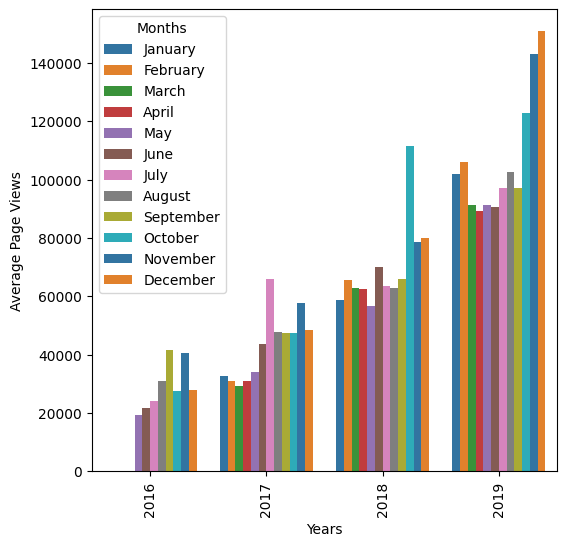

In [56]:
#     # Draw bar plot

fig, ax = plt.subplots(figsize=(6, 6))
hueOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# hueOrder = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# Draw the bar chart
sns.barplot(x='year', y='value', hue='Month', data=df_bar, ax=ax, hue_order=hueOrder,  palette = sns.color_palette(n_colors=12))

# Set labels and title
ax.set_xlabel('Years')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Average Page Views')
ax.legend(title='Months')

plt.show()


In [57]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
# It should show average daily page views for each month grouped by year.
# The legend should show month labels and have a title of Months. On the chart,
# the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot():
#     # Copy and modify data for monthly bar plot
#     df_bar = None
      df_bar = df.reset_index()
      df_bar['year'] = df_bar['date'].str.split('-', expand=True)[0]
      df_bar['month'] = df_bar['date'].str.split('-', expand=True)[1]
      df_bar['Month'] = pd.to_datetime(df_bar['date']).dt.month_name()

      df_bar.drop(columns='date',inplace=True)

      # now grouping by years and months, displaying then daily average(mean)
      df_bar = df_bar.groupby(['year','month','Month']).mean().reset_index()
      # df_bar.tail(13)

#     # Draw bar plot
      fig, ax = plt.subplots(figsize=(6, 6))
      hueOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
      # hueOrder = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

      # Draw the bar chart
      sns.barplot(x='year', y='value', hue='Month', data=df_bar, ax=ax,
                  hue_order=hueOrder,  palette = sns.color_palette(n_colors=12))

      # Set labels and title
      ax.set_xlabel('Years')
      # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
      ax.tick_params(axis='x', labelrotation = 90)
      ax.set_ylabel('Average Page Views')
      ax.legend(title='Months')

      # plt.show()

#     # Save image and return fig (don't change this part)
      fig.savefig('bar_plot.png')
      return fig

## Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots

In [90]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['date'] = pd.to_datetime(df_box['date'])
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.head(3)

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May


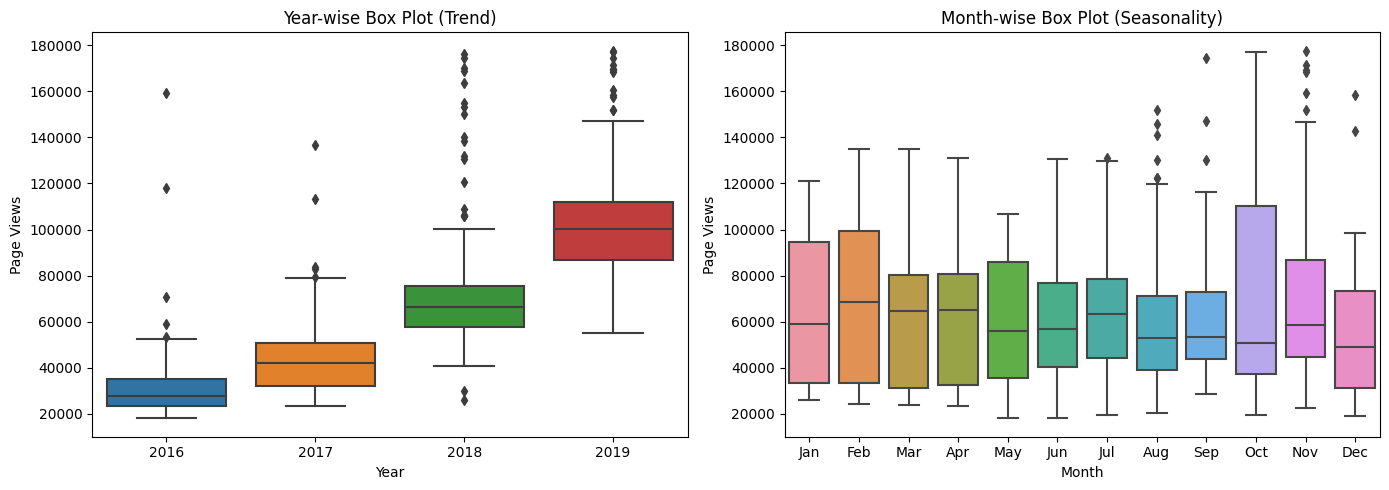

In [95]:
# Draw box plots (using Seaborn)
# info >  https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Year-wise
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

# Month-wise
# sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

plt.tight_layout()
plt.show()


In [96]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots
# similar to "examples/Figure_3.png". These box plots should show how the values are
# distributed within a given year or month and how it compares over time.
# The title of the first chart should be Year-wise Box Plot (Trend) and
# the title of the second chart should be Month-wise Box Plot (Seasonality).
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.
# The boilerplate includes commands to prepare the data.

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['date'] = pd.to_datetime(df_box['date']) #need to change dtype to datetime here
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
# info >  https://seaborn.pydata.org/generated/seaborn.boxplot.html
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Year-wise
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise
    # sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.tight_layout()
    # plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig